## Data Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('/content/drive/My Drive/data/2017/yellow_tripdata_2017-01.parquet')
print(len(df))

9710820


In [4]:
def filter_by_date(df, start_date, end_date):

    df = df.copy()  # Avoid modifying the original DataFrame
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

    mask = (
        (df['tpep_pickup_datetime'] >= start_date) & (df['tpep_pickup_datetime'] <= end_date) &
        (df['tpep_dropoff_datetime'] >= start_date) & (df['tpep_dropoff_datetime'] <= end_date)
    )

    return df[mask]

In [5]:
df = filter_by_date(df, "2017-01-01", "2017-01-31 23:59:59")

In [6]:
df = df.sort_values(by='tpep_pickup_datetime')

In [7]:
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

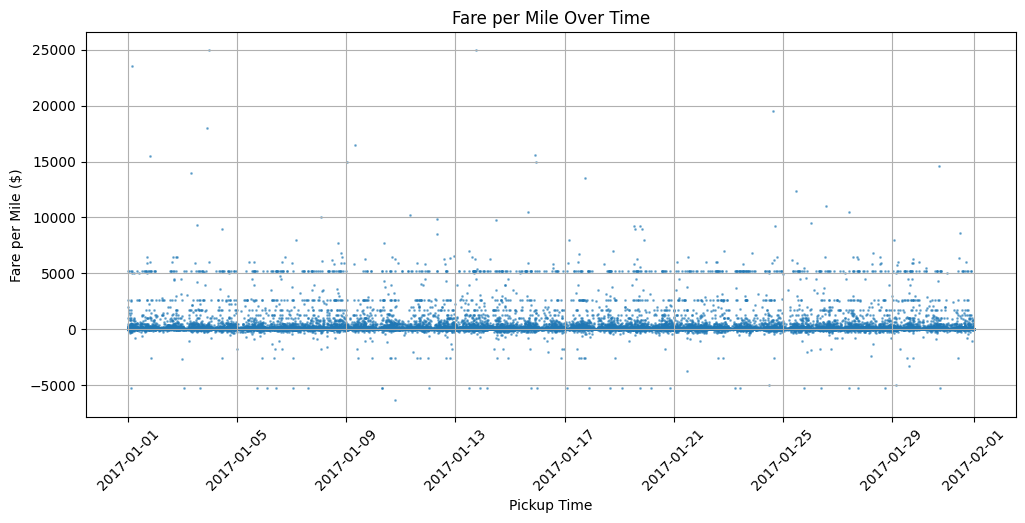

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Create fare per mile column (handle zero distances)
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"].replace(0, float("nan"))

# Plot all data
plt.figure(figsize=(12, 5))
plt.scatter(df["tpep_pickup_datetime"], df["fare_per_mile"], s=1, alpha=0.5)  # s=1 reduces marker size

# Labels and title
plt.xlabel("Pickup Time")
plt.ylabel("Fare per Mile ($)")
plt.title("Fare per Mile Over Time")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [9]:
df['fare_per_mile'].describe()

count    9.649922e+06
mean     6.629839e+00
std      5.369068e+01
min     -6.284000e+03
25%      4.285714e+00
50%      5.434783e+00
75%      6.875000e+00
max      2.500000e+04
Name: fare_per_mile, dtype: float64

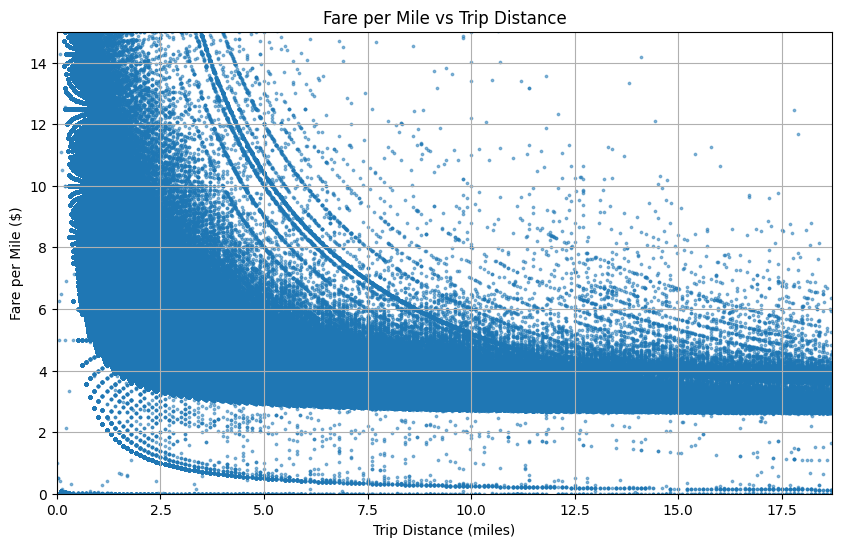

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Handle zero distances to avoid division errors
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"].replace(0, float("nan"))

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["trip_distance"], df["fare_per_mile"], s=3, alpha=0.5)

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare per Mile ($)")
plt.title("Fare per Mile vs Trip Distance")
plt.xlim(0, df["trip_distance"].quantile(0.99))  # Focus on reasonable distances
plt.ylim(0, df["fare_per_mile"].quantile(0.99))  # Avoid extreme outliers
plt.grid(True)

plt.show()

In [8]:
# Compute percentiles to check high fare_per_mile values
q90 = df["fare_per_mile"].quantile(0.90)
q95 = df["fare_per_mile"].quantile(0.95)
q99 = df["fare_per_mile"].quantile(0.99)

print(f"90th percentile: {q90}")
print(f"95th percentile: {q95}")
print(f"99th percentile: {q99}")

# Identify possible outliers
outliers = df[df["fare_per_mile"] > q99]
print(f"Number of extreme outliers (above 99th percentile): {len(outliers)}")

90th percentile: 8.75
95th percentile: 10.256410256410255
99th percentile: 21.73913043478261
Number of extreme outliers (above 99th percentile): 97052


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


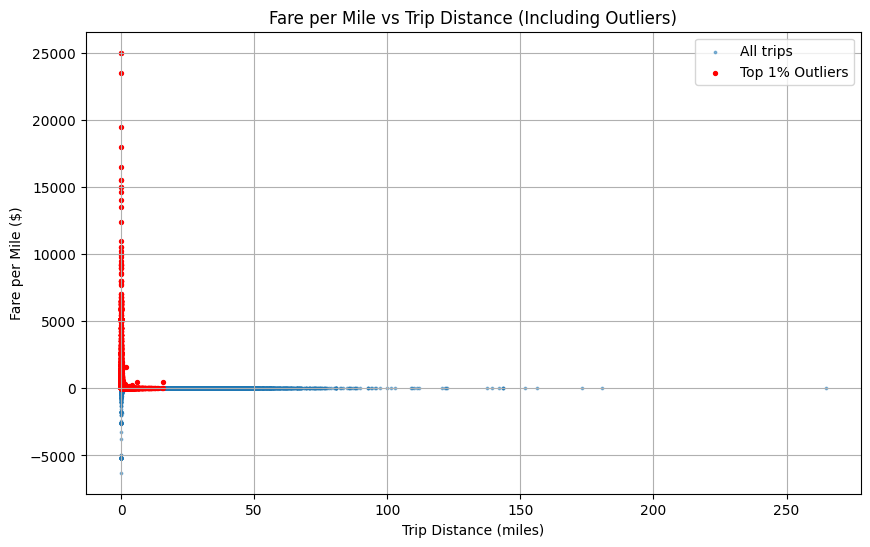

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure trip_distance > 0 to avoid division errors
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"].replace(0, float("nan"))

# Scatter plot (keeping all data points)
plt.figure(figsize=(10, 6))
plt.scatter(df["trip_distance"], df["fare_per_mile"], s=3, alpha=0.5, label="All trips")

# Highlight extreme outliers (top 1% in fare_per_mile)
q99 = df["fare_per_mile"].quantile(0.99)
outliers = df[df["fare_per_mile"] > q99]

plt.scatter(outliers["trip_distance"], outliers["fare_per_mile"], color="red", s=8, label="Top 1% Outliers")

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare per Mile ($)")
plt.title("Fare per Mile vs Trip Distance (Including Outliers)")
plt.legend()
plt.grid(True)

plt.show()

In [9]:
# Show distance range for extreme outliers
outlier_distances = outliers["trip_distance"]
print(f"Outlier trip distance range: {outlier_distances.min()} miles to {outlier_distances.max()} miles")
print(f"Number of extreme outliers: {len(outliers)}")

Outlier trip distance range: 0.0 miles to 15.9 miles
Number of extreme outliers: 97052


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


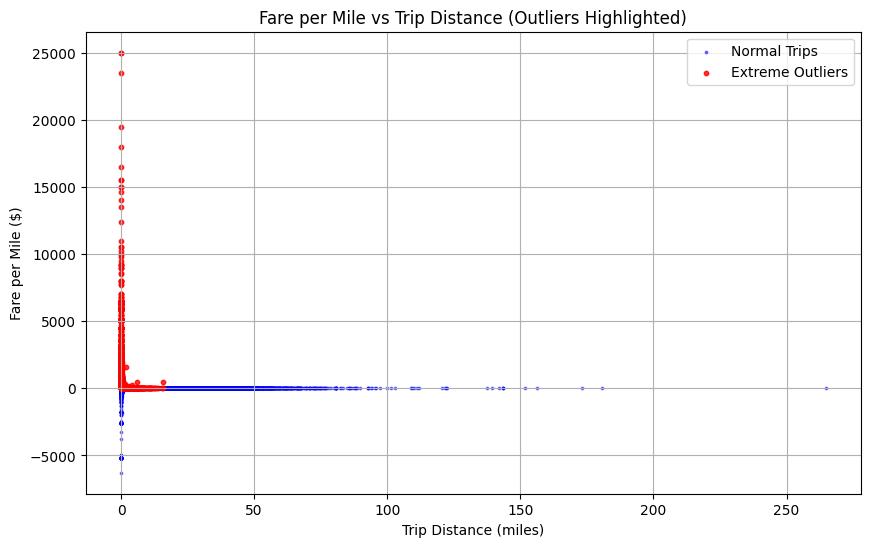

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure trip_distance > 0 to avoid division errors
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"].replace(0, float("nan"))

# Compute the 99th percentile threshold for outliers
q99 = df["fare_per_mile"].quantile(0.99)

# Separate normal trips and outliers
normal_trips = df[df["fare_per_mile"] <= q99]
outliers = df[df["fare_per_mile"] > q99]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(normal_trips["trip_distance"], normal_trips["fare_per_mile"], s=3, alpha=0.5, label="Normal Trips", color="blue")
plt.scatter(outliers["trip_distance"], outliers["fare_per_mile"], s=10, alpha=0.8, label="Extreme Outliers", color="red")

# Labels and title
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare per Mile ($)")
plt.title("Fare per Mile vs Trip Distance (Outliers Highlighted)")
plt.legend()
plt.grid(True)

plt.show()

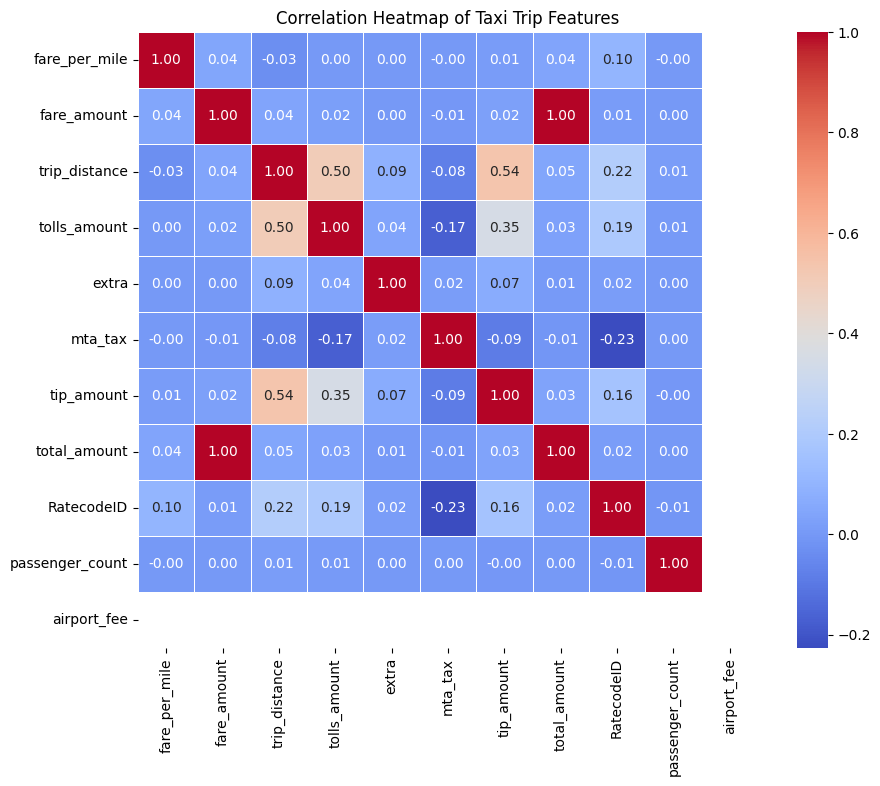

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure trip_distance > 0 and create fare_per_mile column
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"].replace(0, float("nan"))

# Select relevant numerical columns for correlation
corr_columns = [
    "fare_per_mile", "fare_amount", "trip_distance", "tolls_amount", "extra",
    "mta_tax", "tip_amount", "total_amount",
    "RatecodeID", "passenger_count", "airport_fee"
]

# Compute correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Taxi Trip Features")
plt.show()

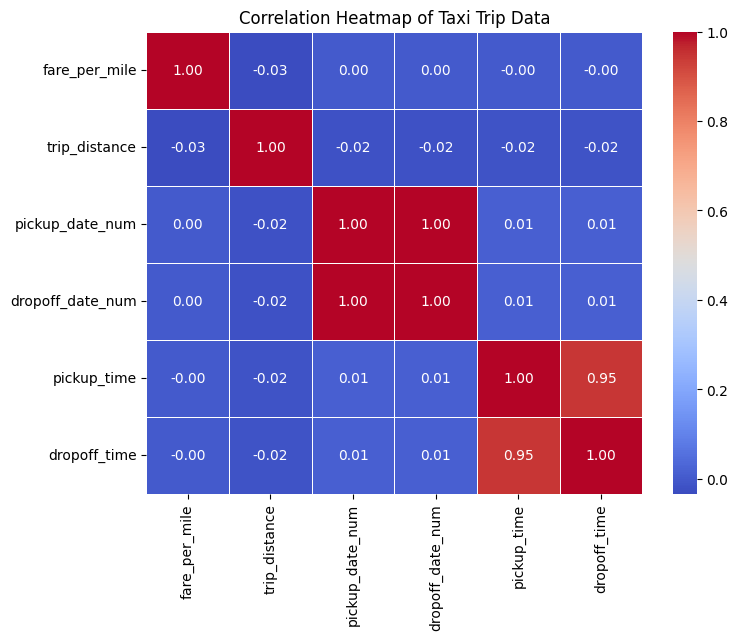

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Extract date and time separately
df["pickup_date"] = df["tpep_pickup_datetime"].dt.date
df["pickup_time"] = df["tpep_pickup_datetime"].dt.hour  # Extracting only hour for correlation
df["dropoff_date"] = df["tpep_dropoff_datetime"].dt.date
df["dropoff_time"] = df["tpep_dropoff_datetime"].dt.hour  # Extracting only hour for correlation

# Convert dates to numerical values (days since the first recorded date)
df["pickup_date_num"] = (pd.to_datetime(df["pickup_date"]) - pd.to_datetime(df["pickup_date"].min())).dt.days
df["dropoff_date_num"] = (pd.to_datetime(df["dropoff_date"]) - pd.to_datetime(df["dropoff_date"].min())).dt.days

# Compute fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]
df.replace([float("inf"), -float("inf")], 0, inplace=True)  # Handle division errors

# Select relevant numerical columns for correlation
corr_cols = ["fare_per_mile", "trip_distance", "pickup_date_num", "dropoff_date_num", "pickup_time", "dropoff_time"]
corr_matrix = df[corr_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Taxi Trip Data")
plt.show()

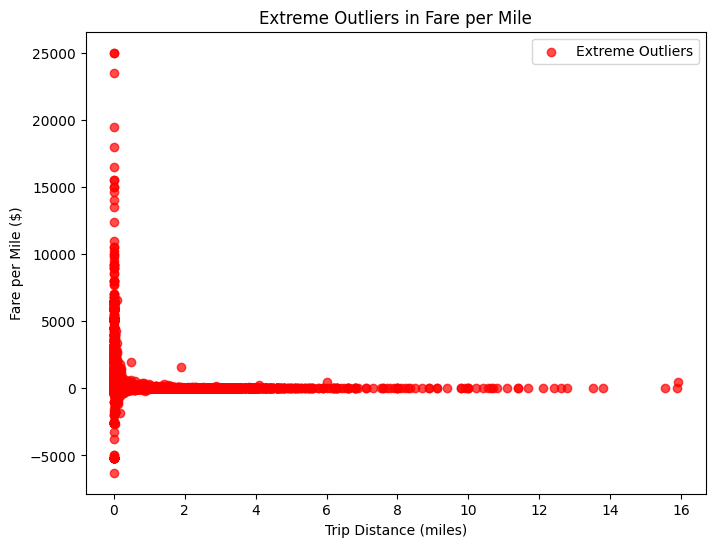

        tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
3823685  2017-01-13 18:03:04   2017-01-13 18:03:08           0.01   
779638   2017-01-03 23:17:28   2017-01-03 23:17:52           0.01   
71950    2017-01-01 03:00:17   2017-01-01 03:00:41           0.01   
7247312  2017-01-24 15:41:09   2017-01-24 15:41:12           0.02   
754909   2017-01-03 21:11:53   2017-01-03 21:11:57           0.01   
2377501  2017-01-09 07:34:14   2017-01-09 07:34:17           0.01   
4545197  2017-01-15 21:55:34   2017-01-15 21:56:35           0.01   
237462   2017-01-01 19:16:14   2017-01-01 19:27:43           0.01   
4579472  2017-01-15 23:14:45   2017-01-15 23:15:43           0.01   
2339588  2017-01-09 00:35:07   2017-01-09 00:35:09           0.01   

         fare_per_mile  fare_amount  
3823685        25000.0        250.0  
779638         25000.0        250.0  
71950          23500.0        235.0  
7247312        19500.0        390.0  
754909         18000.0        180.0  
2377501     

In [12]:
import numpy as np

# Define outlier detection using IQR
Q1 = df["fare_per_mile"].quantile(0.25)
Q3 = df["fare_per_mile"].quantile(0.75)
IQR = Q3 - Q1

# Define extreme outliers as points beyond 3 * IQR
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter extreme outliers
outliers = df[(df["fare_per_mile"] > upper_bound) | (df["fare_per_mile"] < lower_bound)]

# Scatter plot for outliers
plt.figure(figsize=(8, 6))
plt.scatter(outliers["trip_distance"], outliers["fare_per_mile"], color='red', label="Extreme Outliers", alpha=0.7)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare per Mile ($)")
plt.title("Extreme Outliers in Fare per Mile")
plt.legend()
plt.show()

# Display a few extreme outlier rows
outliers_sorted = outliers.sort_values(by="fare_per_mile", ascending=False)
print(outliers_sorted[["tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "fare_per_mile", "fare_amount"]].head(10))

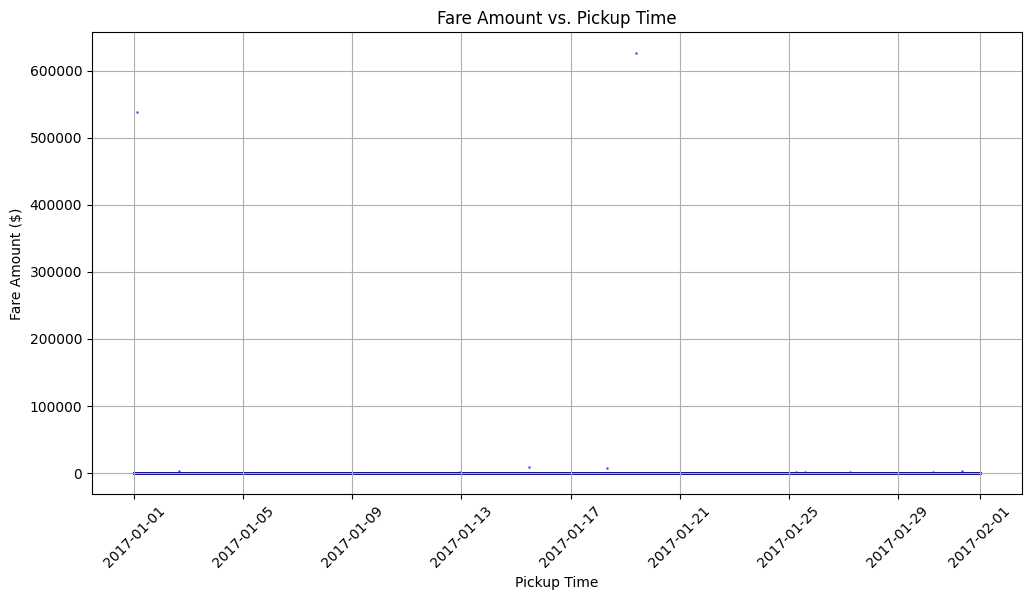

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure pickup time is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Plot scatter for fare amount vs. pickup time
plt.figure(figsize=(12, 6))
plt.scatter(df["tpep_pickup_datetime"], df["fare_amount"], s=1, alpha=0.5, color="blue")

# Labels and title
plt.xlabel("Pickup Time")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Pickup Time")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


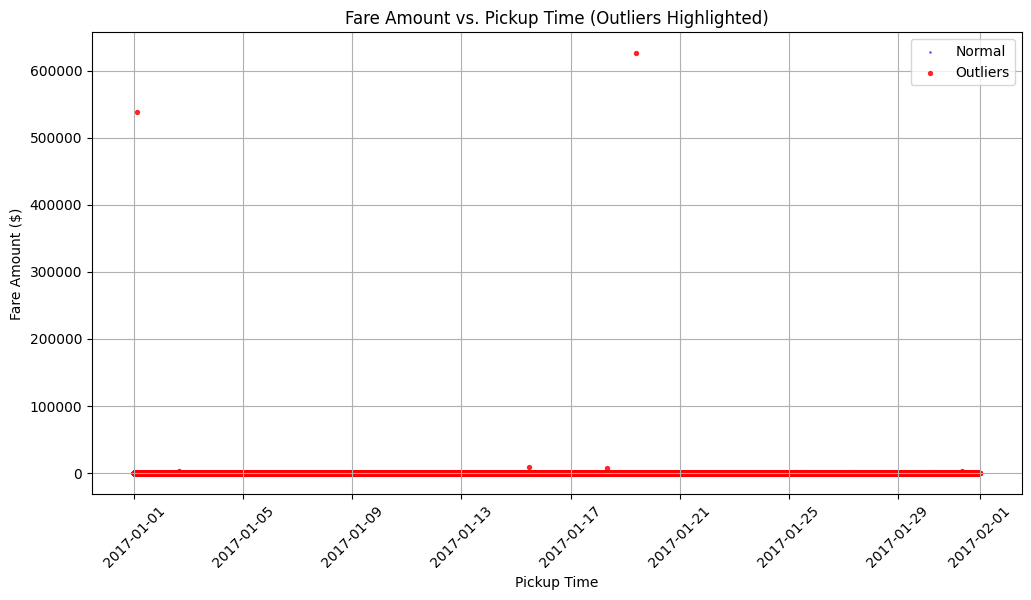

Extreme Outliers (Sorted by Fare Amount):
        tpep_pickup_datetime tpep_dropoff_datetime  fare_amount  trip_distance
5561952  2017-01-19 09:29:44   2017-01-19 09:29:44    625900.80            0.0
63944    2017-01-01 02:15:10   2017-01-01 02:57:09    538579.20            0.0
4378366  2017-01-15 11:00:03   2017-01-15 11:03:40      9000.50            0.0
5227462  2017-01-18 08:30:23   2017-01-18 09:22:07      8037.50           15.9
397923   2017-01-02 15:21:24   2017-01-02 15:33:17      3009.80            6.0
...                      ...                   ...          ...            ...
6318250  2017-01-21 13:36:16   2017-01-21 13:36:33        24.30            2.3
9004099  2017-01-29 16:49:57   2017-01-29 16:50:39        24.30            0.0
2917755  2017-01-10 21:47:00   2017-01-10 21:47:05        24.30            0.0
1053140  2017-01-04 22:57:00   2017-01-04 23:25:55        24.20            7.9
4608221  2017-01-16 04:48:54   2017-01-16 04:49:01        24.15            0.0

[894426 r

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure pickup time is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# Define extreme outliers using 1.5 * IQR rule
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Identify extreme outliers
outliers = df[df["fare_amount"] > upper_bound]
non_outliers = df[df["fare_amount"] <= upper_bound]

# Plot scatter: normal data in blue, outliers in red
plt.figure(figsize=(12, 6))
plt.scatter(non_outliers["tpep_pickup_datetime"], non_outliers["fare_amount"], s=1, alpha=0.5, color="blue", label="Normal")
plt.scatter(outliers["tpep_pickup_datetime"], outliers["fare_amount"], s=8, alpha=0.8, color="red", label="Outliers")  # Larger red markers

# Labels and title
plt.xlabel("Pickup Time")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Pickup Time (Outliers Highlighted)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print extreme outlier rows (sorted by fare amount, descending)
important_cols = ["tpep_pickup_datetime", "tpep_dropoff_datetime", "fare_amount", "trip_distance"]
outliers_sorted = outliers[important_cols].sort_values(by="fare_amount", ascending=False)

print("Extreme Outliers (Sorted by Fare Amount):")
print(outliers_sorted)

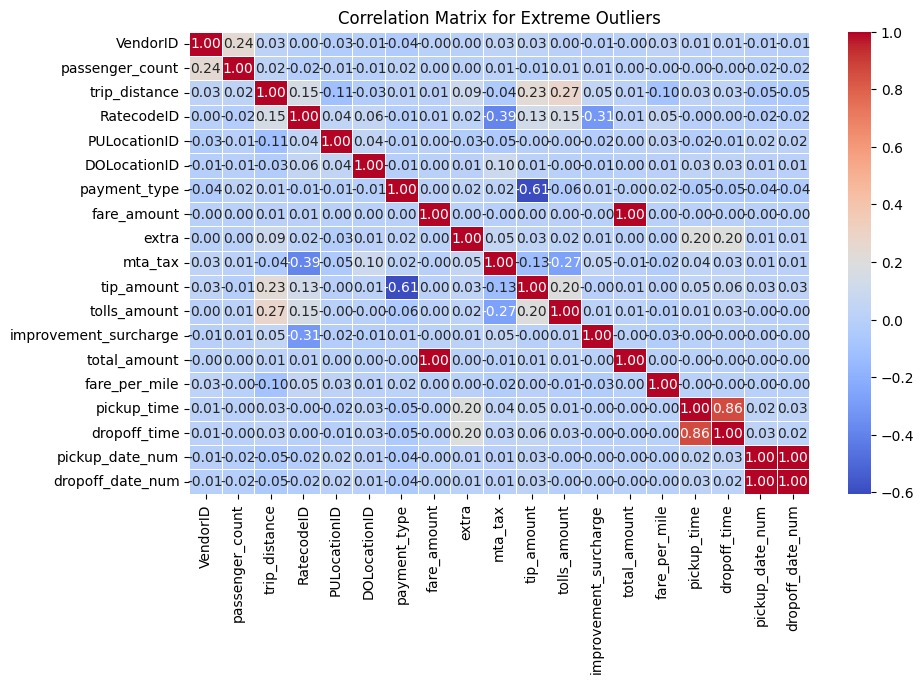

In [20]:
import seaborn as sns
import numpy as np

# Select only extreme outliers
outliers_numeric = outliers.select_dtypes(include=[np.number])  # Only numeric columns

# Compute correlation matrix
corr_matrix = outliers_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Labels and title
plt.title("Correlation Matrix for Extreme Outliers")
plt.show()

In [14]:
# Count trips with negative fare amount
negative_fare_count = (df["fare_amount"] < 0).sum()

# Display the count
print(f"Number of trips with negative fare amount: {negative_fare_count}")

Number of trips with negative fare amount: 4541


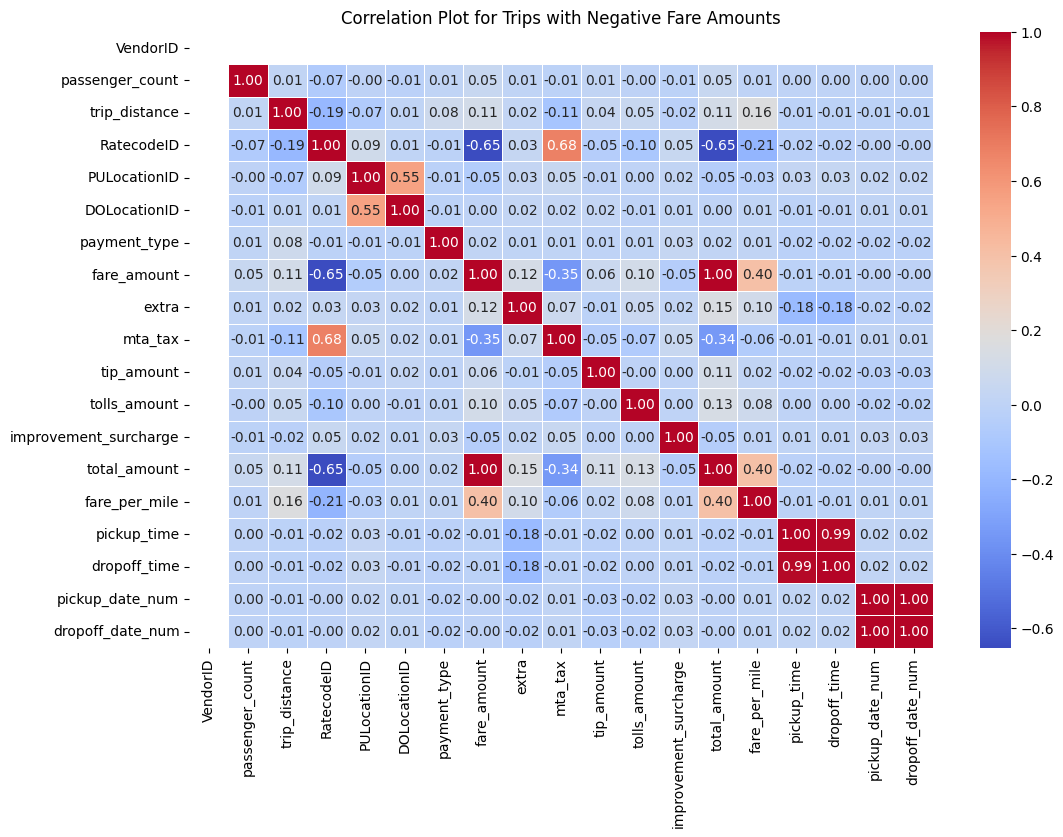

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for negative fare amounts
negative_fare_df = df[df["fare_amount"] < 0]

# Check if there are any negative fare rows
if negative_fare_df.empty:
    print("No trips with negative fare amounts found.")
else:
    # Select only numeric columns
    numeric_cols = negative_fare_df.select_dtypes(include=["number"])

    # Compute correlation matrix
    corr_matrix = numeric_cols.corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Plot for Trips with Negative Fare Amounts")
    plt.show()

In [15]:
# Select relevant columns: fare_amount and RatecodeID
negative_fare_samples = df[df["fare_amount"] < 0][["fare_amount", "RatecodeID"]].sort_values(by="fare_amount")

# Print the rows
print(negative_fare_samples.head(10))  # Print first 10 negative fare entries

         fare_amount  RatecodeID
7737821       -350.0           5
591916        -300.0           5
3341894       -192.0           5
5435271       -169.0           5
9466214       -150.0           5
3602705       -149.0           5
3352412       -148.5           5
7340185       -140.0           5
2747187       -125.0           5
3616988       -120.0           5


In [16]:
# Count occurrences of each RatecodeID among negative fare amounts
negative_fare_counts = df[df["fare_amount"] < 0]["RatecodeID"].value_counts()

# Print the frequency distribution
print(negative_fare_counts)

RatecodeID
1    4071
2     253
5     169
3      46
4       2
Name: count, dtype: int64


In [17]:
# Count unique values in passenger_count
passenger_counts = df["passenger_count"].value_counts().sort_index()

# Print the results
print(passenger_counts)


passenger_count
0        533
1    6959934
2    1402203
3     390841
4     182153
5     485779
6     287079
7         22
8         21
9         28
Name: count, dtype: int64


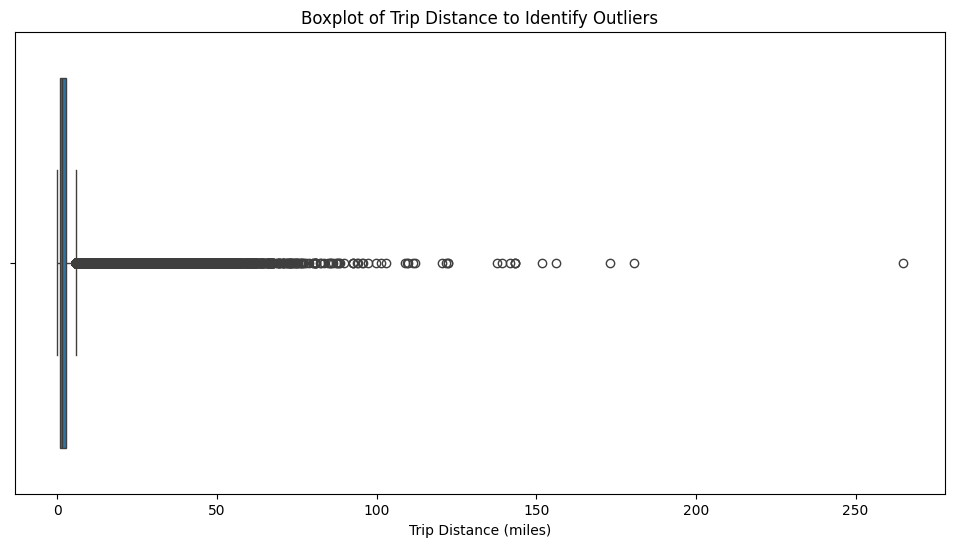

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the trip distance distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["trip_distance"])
plt.xlabel("Trip Distance (miles)")
plt.title("Boxplot of Trip Distance to Identify Outliers")
plt.show()

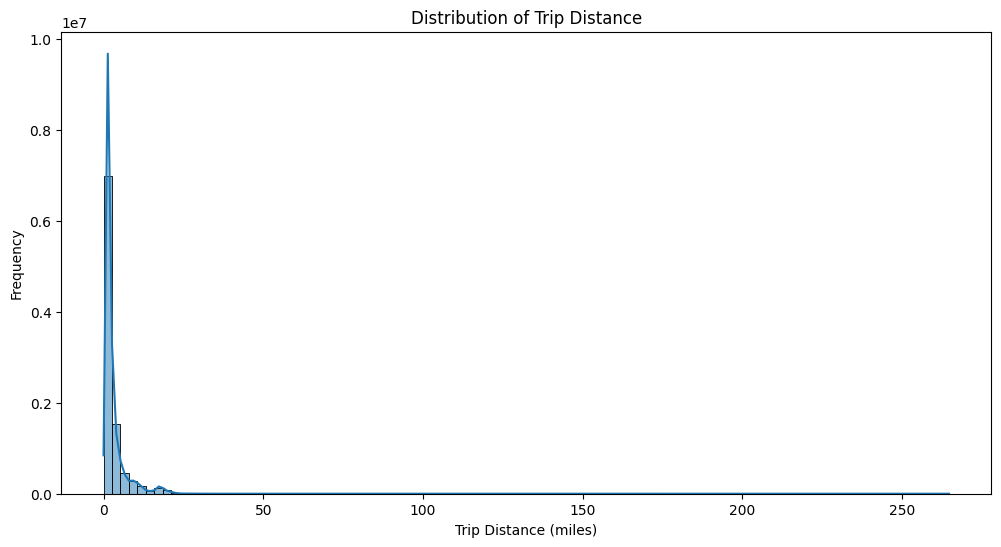

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df["trip_distance"], bins=100, kde=True)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance")
plt.show()

Sample of Average Distance Trips:
         trip_distance  fare_amount  fare_per_mile
7632110           1.46          8.5       5.821918
1574538           1.47          8.0       5.442177
5457865           1.50         12.0       8.000000
4176809           1.50          7.5       5.000000
8041846           1.50          7.5       5.000000
1413057           1.50          8.0       5.333333
2720977           1.50         10.5       7.000000
3235550           1.51          8.5       5.629139
2169507           1.52          9.0       5.921053
5819025           1.55          8.0       5.161290
7368390           1.56          7.5       4.807692
2138003           1.57          8.0       5.095541
6243352           1.59          8.5       5.345912
1156291           1.60         13.5       8.437500
8601003           1.63          8.5       5.214724
1316821           1.67          8.5       5.089820
6817032           1.68          8.5       5.059524
8462189           1.70          8.5       5.0000

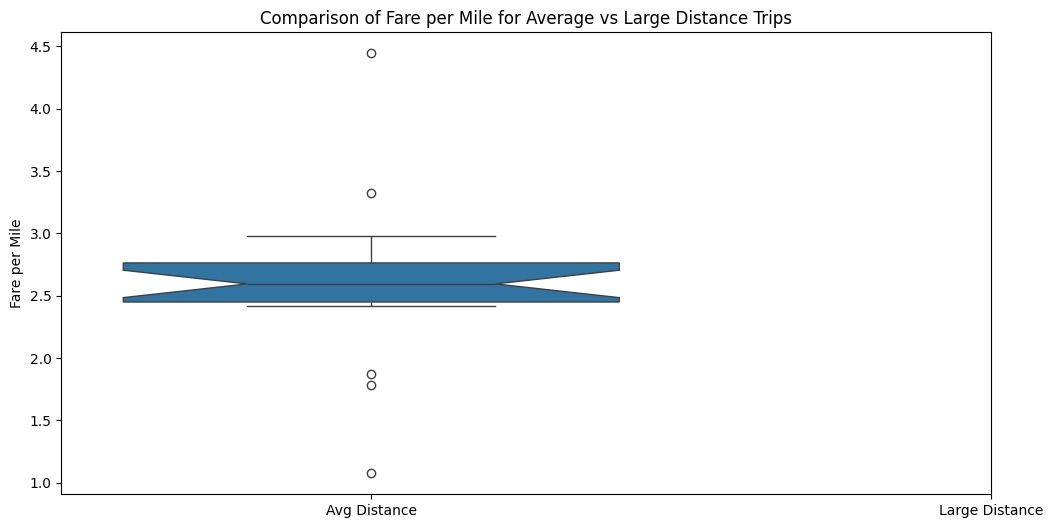

In [28]:
import numpy as np

# Define average and large distance thresholds
avg_distance = df["trip_distance"].median()
large_distance = df["trip_distance"].quantile(0.99)  # Top 1% as large distance

# Sample 20 trips around the average distance
sample_avg = df[(df["trip_distance"] >= avg_distance * 0.9) & (df["trip_distance"] <= avg_distance * 1.1)].sample(20, random_state=42)

# Sample 20 trips with very large distances
sample_large = df[df["trip_distance"] >= large_distance].sample(20, random_state=42)

# Print comparison
print("Sample of Average Distance Trips:")
print(sample_avg[["trip_distance", "fare_amount", "fare_per_mile"]].sort_values(by="trip_distance"))

print("\nSample of Large Distance Trips:")
print(sample_large[["trip_distance", "fare_amount", "fare_per_mile"]].sort_values(by="trip_distance"))

# Boxplot to visualize fare per mile distribution for both
plt.figure(figsize=(12, 6))
sns.boxplot(data=[sample_avg["fare_per_mile"], sample_large["fare_per_mile"]], notch=True)
plt.xticks([0, 1], ["Avg Distance", "Large Distance"])
plt.ylabel("Fare per Mile")
plt.title("Comparison of Fare per Mile for Average vs Large Distance Trips")
plt.show()

In [18]:
# Define extreme outlier threshold using IQR method
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR  # Anything above this is an extreme outlier

# Remove extreme outliers and negative fares
df = df[(df["fare_amount"] >= 0) & (df["fare_amount"] <= upper_bound)]

# Print how many rows were removed
print(f"New dataset size after cleaning: {df.shape[0]}")

New dataset size after cleaning: 8809626


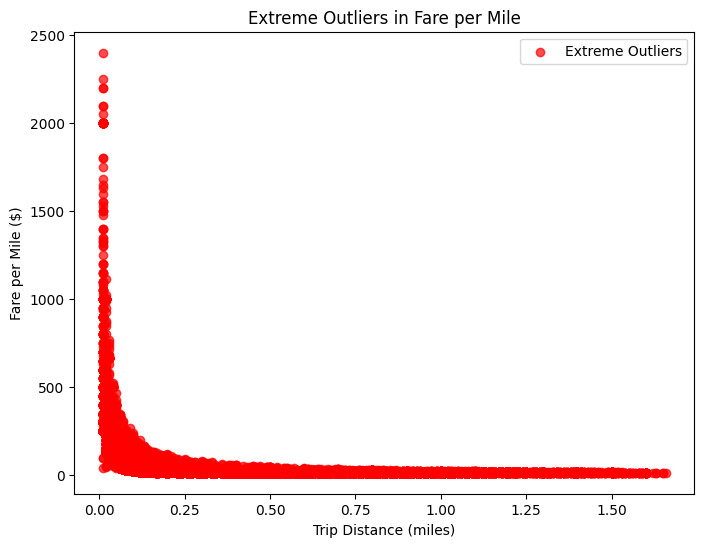

        tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
8500438  2017-01-28 05:35:20   2017-01-28 05:35:29           0.01   
8551685  2017-01-28 11:26:54   2017-01-28 12:07:54           0.01   
7551158  2017-01-25 14:24:09   2017-01-25 15:03:21           0.01   
539575   2017-01-03 07:59:21   2017-01-03 08:01:24           0.01   
3963487  2017-01-14 01:23:59   2017-01-14 01:24:31           0.01   
1304552  2017-01-05 18:29:45   2017-01-05 18:34:02           0.01   
1102757  2017-01-05 06:44:08   2017-01-05 06:45:22           0.01   
821399   2017-01-04 07:38:39   2017-01-04 07:38:46           0.01   
9046685  2017-01-29 18:50:04   2017-01-29 18:50:13           0.01   
11126    2017-01-01 00:04:14   2017-01-01 00:42:39           0.01   

         fare_per_mile  fare_amount  
8500438         2400.0         24.0  
8551685         2250.0         22.5  
7551158         2200.0         22.0  
539575          2200.0         22.0  
3963487         2100.0         21.0  
1304552     

In [19]:
import numpy as np

# Define outlier detection using IQR
Q1 = df["fare_per_mile"].quantile(0.25)
Q3 = df["fare_per_mile"].quantile(0.75)
IQR = Q3 - Q1

# Define extreme outliers as points beyond 3 * IQR
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter extreme outliers
outliers = df[(df["fare_per_mile"] > upper_bound) | (df["fare_per_mile"] < lower_bound)]

# Scatter plot for outliers
plt.figure(figsize=(8, 6))
plt.scatter(outliers["trip_distance"], outliers["fare_per_mile"], color='red', label="Extreme Outliers", alpha=0.7)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare per Mile ($)")
plt.title("Extreme Outliers in Fare per Mile")
plt.legend()
plt.show()

# Display a few extreme outlier rows
outliers_sorted = outliers.sort_values(by="fare_per_mile", ascending=False)
print(outliers_sorted[["tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "fare_per_mile", "fare_amount"]].head(10))

In [20]:
# Calculate fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Identify extreme outliers in fare per mile using IQR method
Q1_fpm = df["fare_per_mile"].quantile(0.25)
Q3_fpm = df["fare_per_mile"].quantile(0.75)
IQR_fpm = Q3_fpm - Q1_fpm
upper_bound_fpm = Q3_fpm + 1.5 * IQR_fpm  # Extreme outlier threshold

# Filter extreme outliers
extreme_fpm_outliers = df[df["fare_per_mile"] > upper_bound_fpm]

# Get the range of trip distances for these outliers
min_distance = extreme_fpm_outliers["trip_distance"].min()
max_distance = extreme_fpm_outliers["trip_distance"].max()

# Print results
print(f"Range of trip distances with extreme fare per mile outliers: {min_distance} to {max_distance}")

Range of trip distances with extreme fare per mile outliers: 0.0 to 2.23


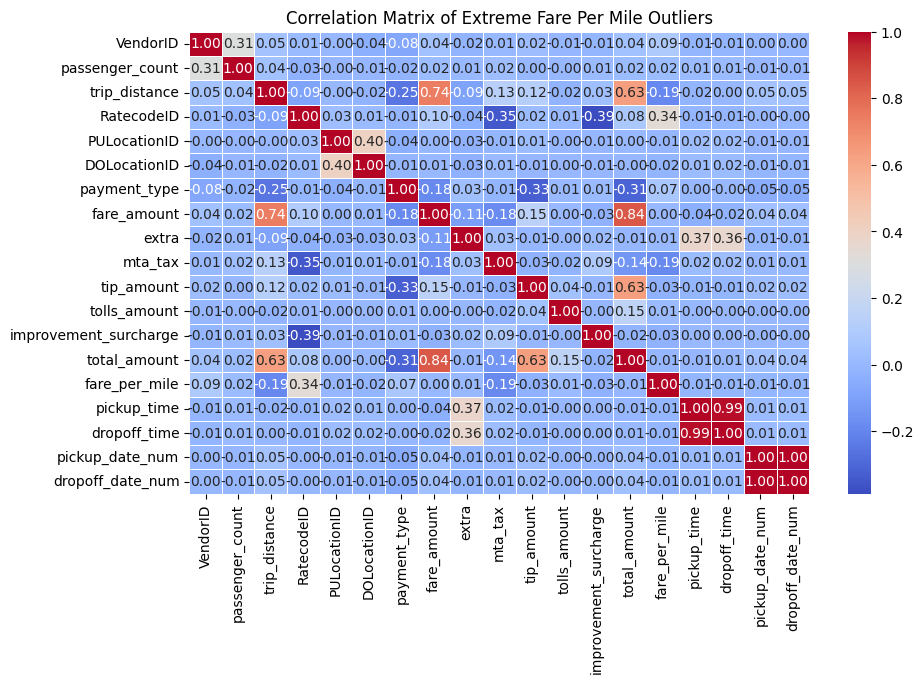

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = extreme_fpm_outliers.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix_outliers = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_outliers, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Extreme Fare Per Mile Outliers")
plt.show()

In [33]:
df['fare_per_mile'].describe()

count    8.808993e+06
mean              inf
std               NaN
min      0.000000e+00
25%      4.597701e+00
50%      5.633803e+00
75%      7.058824e+00
max               inf
Name: fare_per_mile, dtype: float64

Total trips with infinite fare per mile: 41109
         fare_amount  trip_distance tpep_pickup_datetime tpep_dropoff_datetime
2073130        24.00            0.0  2017-01-08 02:59:42   2017-01-08 02:59:45
3125261        24.00            0.0  2017-01-11 16:01:54   2017-01-11 16:01:57
8494562        24.00            0.0  2017-01-28 04:16:17   2017-01-28 04:16:21
7726526        24.00            0.0  2017-01-25 23:12:43   2017-01-25 23:13:26
91686          24.00            0.0  2017-01-01 04:56:52   2017-01-01 04:56:54
...              ...            ...                  ...                   ...
3599697         0.01            0.0  2017-01-13 01:10:57   2017-01-13 01:11:41
6216643         0.01            0.0  2017-01-21 03:31:23   2017-01-21 03:32:02
1108367         0.01            0.0  2017-01-05 07:26:03   2017-01-05 07:27:02
6219257         0.01            0.0  2017-01-21 04:00:40   2017-01-21 04:12:40
2089540         0.01            0.0  2017-01-08 03:58:52   2017-01-08 03:59:11

[411

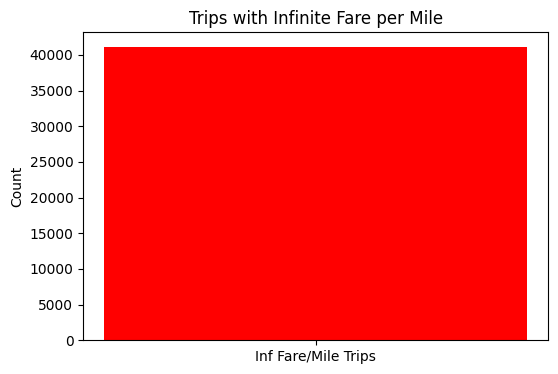

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Identify cases where fare per mile is infinite
inf_fpm_df = df[(df["trip_distance"] == 0) & (df["fare_amount"] > 0)]

# Count occurrences
inf_fpm_count = len(inf_fpm_df)

# Print the count
print(f"Total trips with infinite fare per mile: {inf_fpm_count}")

# Display relevant rows
print(inf_fpm_df[["fare_amount", "trip_distance", "tpep_pickup_datetime", "tpep_dropoff_datetime"]].sort_values(by="fare_amount", ascending=False))

# Plot the number of such cases
plt.figure(figsize=(6, 4))
plt.bar(["Inf Fare/Mile Trips"], [inf_fpm_count], color="red")
plt.ylabel("Count")
plt.title("Trips with Infinite Fare per Mile")
plt.show()

In [35]:
# Include both numeric and categorical statistics
extreme_fpm_outliers.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  402101.000000                      402101                      402101   
mean        1.437616  2017-01-17 09:23:24.170027  2017-01-17 09:31:30.825691   
min         1.000000         2017-01-01 00:00:13         2017-01-01 00:01:04   
25%         1.000000         2017-01-10 12:57:08         2017-01-10 13:05:27   
50%         1.000000         2017-01-17 18:24:28         2017-01-17 18:34:32   
75%         2.000000         2017-01-24 16:46:34         2017-01-24 16:55:21   
max         2.000000         2017-01-31 23:59:13         2017-01-31 23:59:17   
std         0.496094                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    402101.000000  402101.000000  402101.000000  402101.000000   
mean          1.509954       0.415236       1.089739     168.920627   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       0.230000       1.000000     132.000000   
50%           1.000000       0.390000       1.000000     163.000000   
75%           1.000000       0.550000       1.000000     234.000000   
max           9.000000       2.230000      99.000000     265.000000   
std           1.156723       0.301840       1.335012      64.571928   

        DOLocationID   payment_type    fare_amount  ...        mta_tax  \
count  402101.000000  402101.000000  402101.000000  ...  402101.000000   
mean      169.432931       1.525097       6.090810  ...       0.493025   
min         1.000000       1.000000       0.010000  ...       0.000000   
25%       137.000000       1.000000       3.500000  ...       0.500000   
50%       163.000000       1.000000       5.000000  ...       0.500000   
75%       233.000000       2.000000       7.500000  ...       0.500000   
max       265.000000       4.000000      24.000000  ...      15.400000   
std        64.389383       0.578548       3.624914  ...       0.063320   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  402101.000000  402101.000000          402101.000000  402101.000000   
mean        0.862230       0.010614               0.299818       8.019428   
min         0.000000       0.000000               0.000000       0.010000   
25%         0.000000       0.000000               0.300000       5.160000   
50%         0.000000       0.000000               0.300000       6.800000   
75%         1.300000       0.000000               0.300000       9.360000   
max       255.550000     243.700000               0.300000     297.600000   
std         2.385121       0.602842               0.007388       4.651887   

       fare_per_mile    pickup_time   dropoff_time  pickup_date_num  \
count   4.021010e+05  402101.000000  402101.000000    402101.000000   
mean             inf      13.140400      13.221852        15.822821   
min     1.075269e+01       0.000000       0.000000         0.000000   
25%     1.162791e+01      10.000000      10.000000         9.000000   
50%     1.300000e+01      13.000000      13.000000        16.000000   
75%     1.750000e+01      17.000000      17.000000        23.000000   
max              inf      23.000000      23.000000        30.000000   
std              NaN       5.302986       5.308795         8.525719   

       dropoff_date_num  
count     402101.000000  
mean          15.825116  
min            0.000000  
25%            9.000000  
50%           16.000000  
75%           23.000000  
max           30.000000  
std            8.526136  

[8 rows x 21 columns]

Total trips with zero distance: 41742
      fare_amount  total_amount tpep_pickup_datetime tpep_dropoff_datetime  \
223           3.0           4.3  2017-01-01 00:00:34   2017-01-01 00:02:33   
5899          2.5           3.8  2017-01-01 00:00:50   2017-01-01 00:01:31   
3587          4.0           5.3  2017-01-01 00:04:12   2017-01-01 00:08:08   
7032          2.5           3.8  2017-01-01 00:04:20   2017-01-01 00:05:07   
957           2.5           3.8  2017-01-01 00:05:25   2017-01-01 00:05:25   

      RatecodeID  passenger_count  
223            1                1  
5899           1                1  
3587           1                1  
7032           1                2  
957            1                1  


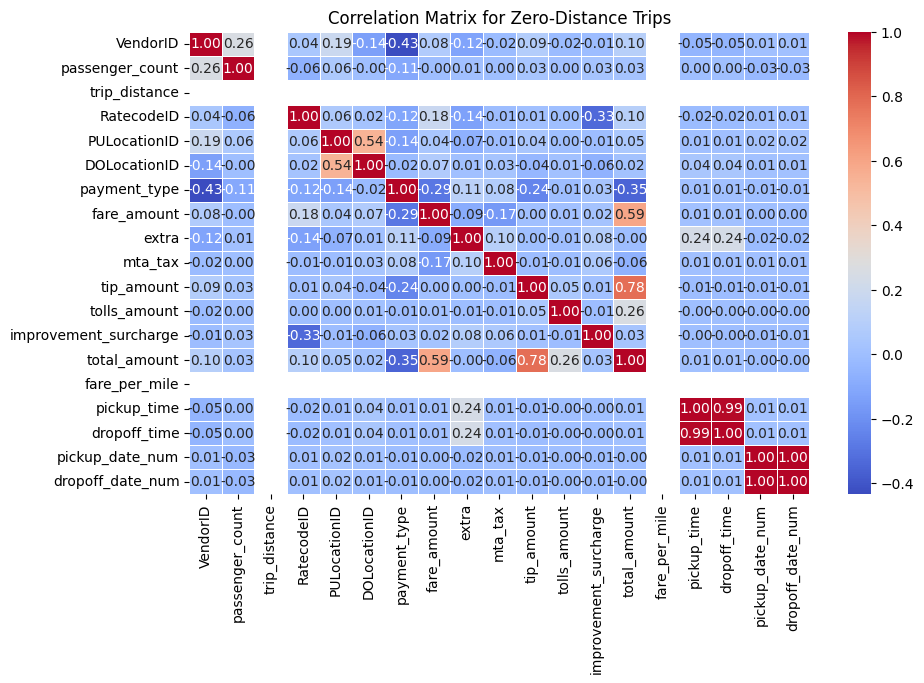

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter trips where trip distance is 0
zero_distance_df = df[df["trip_distance"] == 0]

# Count total such trips
zero_distance_count = len(zero_distance_df)
print(f"Total trips with zero distance: {zero_distance_count}")

# Display relevant columns for investigation
print(zero_distance_df[["fare_amount", "total_amount", "tpep_pickup_datetime", "tpep_dropoff_datetime", "RatecodeID", "passenger_count"]].head())

# Compute correlation matrix (only numeric columns)
corr_matrix = zero_distance_df.select_dtypes(include=["number"]).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Zero-Distance Trips")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


           VendorID  passenger_count  trip_distance    RatecodeID  \
count  41742.000000     41742.000000        41742.0  41742.000000   
mean       1.332902         1.295338            0.0      1.883067   
std        0.471257         0.889219            0.0      4.606601   
min        1.000000         0.000000            0.0      1.000000   
25%        1.000000         1.000000            0.0      1.000000   
50%        1.000000         1.000000            0.0      1.000000   
75%        2.000000         1.000000            0.0      1.000000   
max        2.000000         9.000000            0.0     99.000000   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  41742.000000  41742.000000  41742.000000  41742.000000  41742.000000   
mean     169.375401    179.648364      1.944301      5.301628      0.266686   
std       72.287258     75.525474      0.733564      4.992086      0.357523   
min        1.000000      1.000000      1.000000      0.000000 

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


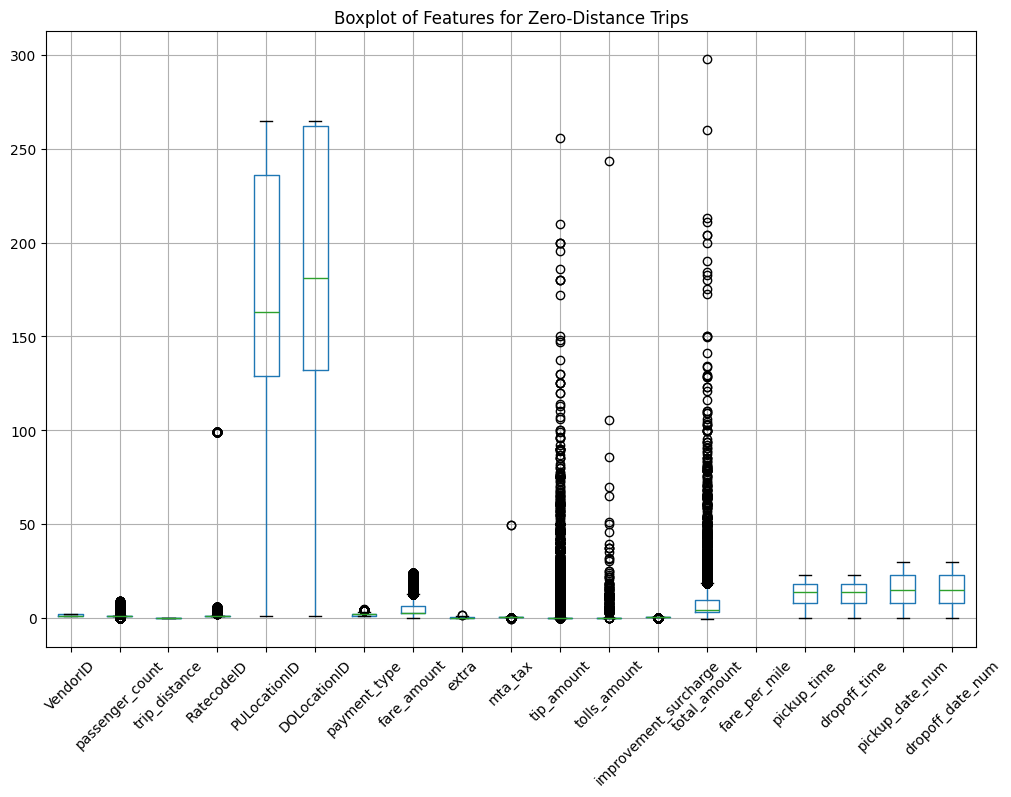

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = zero_distance_df.select_dtypes(include=["number"])

# Display descriptive statistics
print(numeric_cols.describe())

# Plot boxplots for key features
plt.figure(figsize=(12, 8))
numeric_cols.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Features for Zero-Distance Trips")
plt.show()

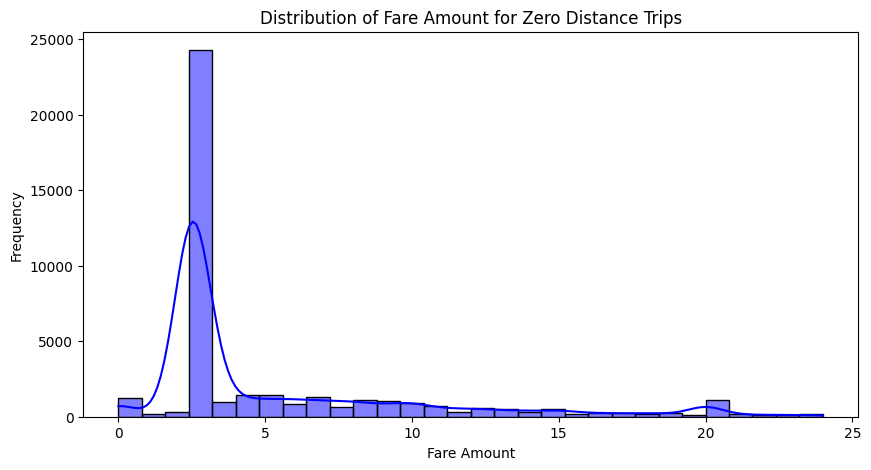

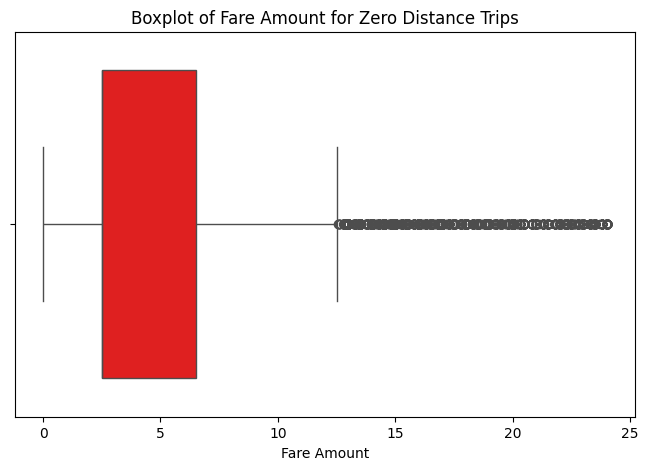

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(zero_distance_df["fare_amount"], bins=30, kde=True, color="blue")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Fare Amount for Zero Distance Trips")
plt.show()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=zero_distance_df["fare_amount"], color="red")
plt.xlabel("Fare Amount")
plt.title("Boxplot of Fare Amount for Zero Distance Trips")
plt.show()

In [39]:
# Frequency table of fare amounts for zero distance trips
fare_frequency = zero_distance_df["fare_amount"].value_counts().sort_index()
print(fare_frequency)

fare_amount
0.00     633
0.01     589
0.02       3
0.04       1
0.05       6
        ... 
23.44      1
23.50     39
23.70      1
23.80     16
24.00     72
Name: count, Length: 336, dtype: int64


In [40]:
# Get top 10 most frequent fare amounts for zero distance trips
top_10_fare_frequency = zero_distance_df["fare_amount"].value_counts().nlargest(10)
print(top_10_fare_frequency)

fare_amount
2.5     21777
3.0      2493
20.0      986
3.5       953
4.0       765
5.0       753
6.0       709
10.0      701
7.0       653
8.0       640
Name: count, dtype: int64


In [41]:
# Compute fare amount frequency
fare_counts = zero_distance_df["fare_amount"].value_counts()

# Get the most probable fare and its percentage share
most_probable_fare = fare_counts.idxmax()  # Fare with highest count
most_probable_fare_count = fare_counts.max()  # Frequency of most probable fare
total_zero_distance_trips = len(zero_distance_df)  # Total trips with 0 distance
percentage_share = (most_probable_fare_count / total_zero_distance_trips) * 100  # Percentage

# Print results
print(f"Most probable fare amount: {most_probable_fare}")
print(f"Count: {most_probable_fare_count}")
print(f"Percentage share: {percentage_share:.2f}%")

Most probable fare amount: 2.5
Count: 21777
Percentage share: 52.17%


In [21]:
# Remove rows where trip distance is 0
df = df[df["trip_distance"] > 0].reset_index(drop=True)

# Verify removal
print(f"Total rows after removing 0 distance trips: {len(df)}")

Total rows after removing 0 distance trips: 8767884


In [43]:
df['fare_per_mile'].describe()

count    8.767884e+06
mean     6.289822e+00
std      8.243357e+00
min      0.000000e+00
25%      4.589372e+00
50%      5.625000e+00
75%      7.024793e+00
max      2.400000e+03
Name: fare_per_mile, dtype: float64

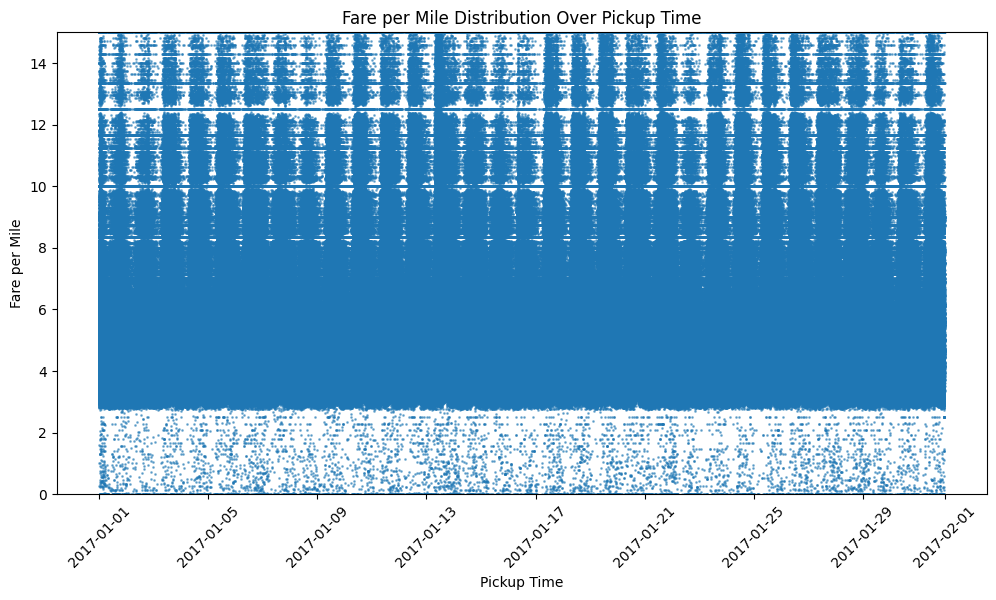

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure pickup time is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Calculate fare per mile
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df["tpep_pickup_datetime"], df["fare_per_mile"], s=1, alpha=0.5)
plt.xlabel("Pickup Time")
plt.ylabel("Fare per Mile")
plt.title("Fare per Mile Distribution Over Pickup Time")
plt.xticks(rotation=45)

# Set Y-axis limit to exclude extreme outliers (99th percentile)
plt.ylim(0, df["fare_per_mile"].quantile(0.99))

plt.show()

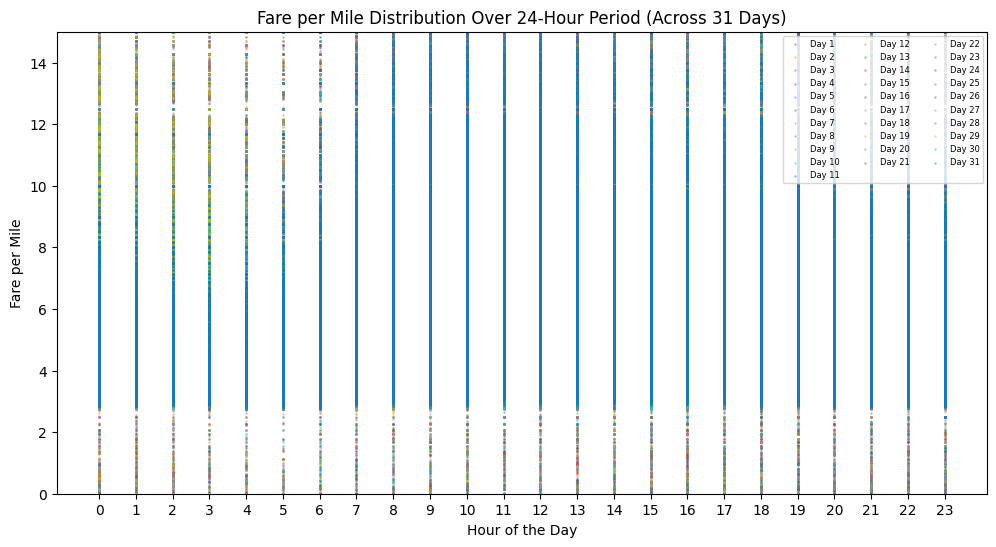

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract hour and day from pickup datetime
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day

# Plot fare per mile across 24 hours for each day
plt.figure(figsize=(12, 6))

for day in sorted(df["pickup_day"].unique()):  # Iterate over all days
    subset = df[df["pickup_day"] == day]  # Get data for a specific day
    plt.scatter(subset["pickup_hour"], subset["fare_per_mile"], s=1, alpha=0.3, label=f"Day {day}")

plt.xlabel("Hour of the Day")
plt.ylabel("Fare per Mile")
plt.title("Fare per Mile Distribution Over 24-Hour Period (Across 31 Days)")
plt.xticks(range(24))
plt.ylim(0, df["fare_per_mile"].quantile(0.99))  # Exclude extreme outliers
plt.legend(fontsize=6, loc="upper right", ncol=3)  # Small legend to fit multiple days
plt.show()

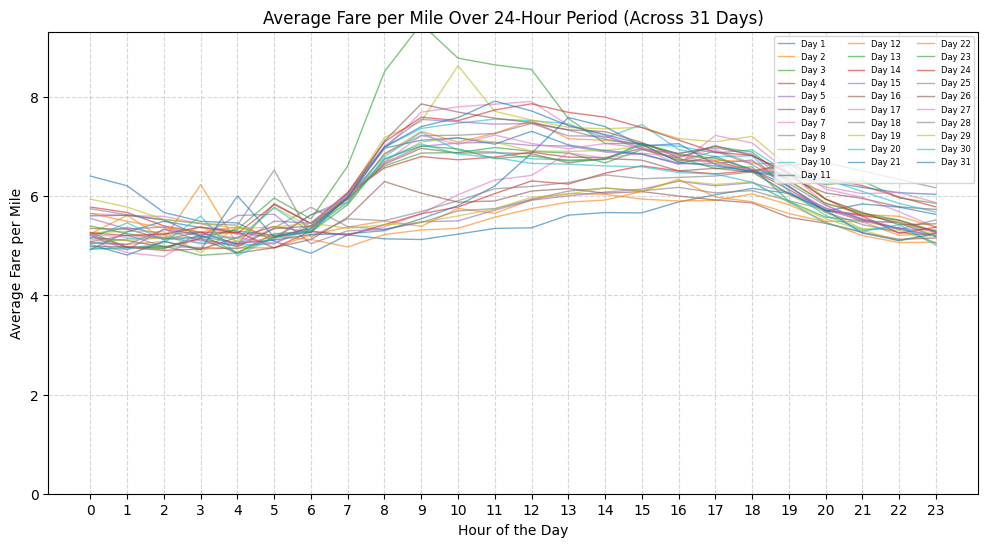

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract hour and day from pickup datetime
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_day"] = df["tpep_pickup_datetime"].dt.day

# Compute average fare per mile for each hour of each day
avg_fpm_per_hour = df.groupby(["pickup_day", "pickup_hour"])["fare_per_mile"].mean().unstack(0)

# Plot
plt.figure(figsize=(12, 6))

for day in avg_fpm_per_hour.columns:  # Loop through all 31 days
    plt.plot(avg_fpm_per_hour.index, avg_fpm_per_hour[day], label=f"Day {day}", alpha=0.6, linewidth=1)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile Over 24-Hour Period (Across 31 Days)")
plt.xticks(range(24))
plt.ylim(0, avg_fpm_per_hour.quantile(0.99).max())  # Exclude extreme outliers
plt.legend(fontsize=6, loc="upper right", ncol=3)  # Compact legend
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

<Figure size 1200x600 with 0 Axes>

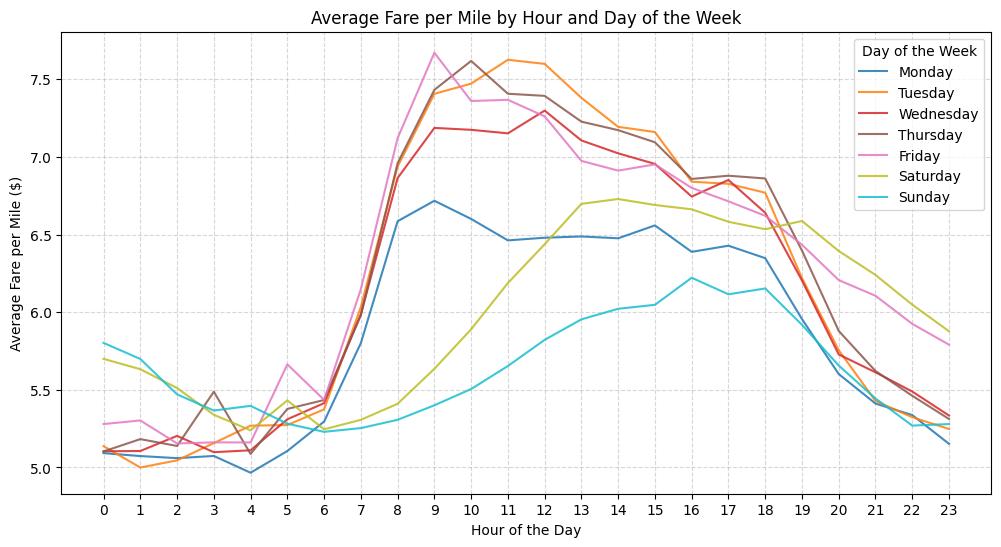

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format (only needed once)
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract relevant time features
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.day_name()
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# Group by weekday and hour, then compute mean fare per mile
hourly_fpm = df.groupby(["pickup_weekday", "pickup_hour"])["fare_per_mile"].mean().unstack()

# Reorder days to start from Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hourly_fpm = hourly_fpm.reindex(ordered_days)

# Plot
plt.figure(figsize=(12, 6))
hourly_fpm.T.plot(figsize=(12, 6), cmap="tab10", alpha=0.85)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour and Day of the Week")
plt.legend(title="Day of the Week")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(range(24))
plt.show()

In [48]:
df = df.reset_index()

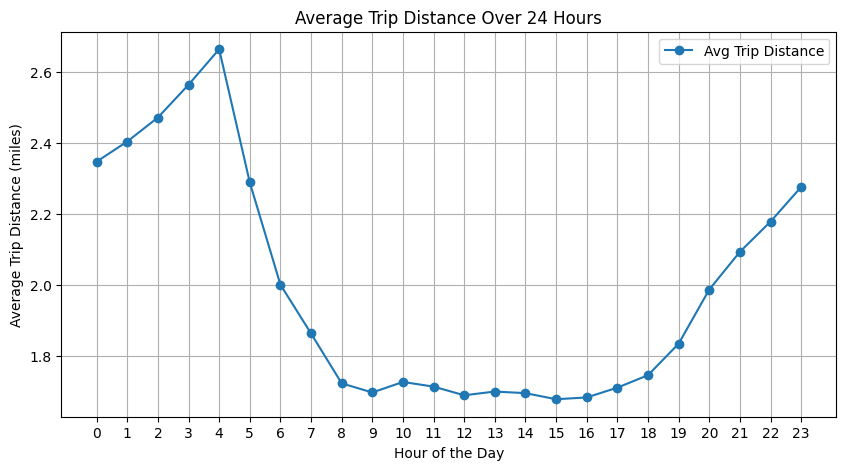

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the pickup time is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract hour of the day from pickup time
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Compute the average trip distance per hour
avg_distance_per_hour = df.groupby("hour")["trip_distance"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_distance_per_hour.index, avg_distance_per_hour.values, marker='o', linestyle='-', label="Avg Trip Distance")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Trip Distance (miles)")
plt.title("Average Trip Distance Over 24 Hours")
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

In [50]:
df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'fare_per_mile',
       'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time',
       'pickup_date_num', 'dropoff_date_num', 'pickup_hour', 'pickup_day',
       'pickup_weekday', 'hour'],
      dtype='object')

In [51]:
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2017-01-01 00:00:02   2017-01-01 00:39:22   
1      1         1  2017-01-01 00:00:02   2017-01-01 00:03:50   
2      2         1  2017-01-01 00:00:03   2017-01-01 00:06:58   
3      3         2  2017-01-01 00:00:05   2017-01-01 00:05:04   
4      4         1  2017-01-01 00:00:05   2017-01-01 00:08:33   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                4           7.75           1                  N   
1                1           0.50           1                  N   
2                1           0.80           1                  N   
3                5           1.76           1                  N   
4                2           0.90           1                  N   

   PULocationID  DOLocationID  ...  pickup_date  pickup_time  dropoff_date  \
0           186            36  ...   2017-01-01            0    2017-01-01   
1            48            48  ...   2017-01-01            0    2017-01-01   
2           162           161  ...   2017-01-01            0    2017-01-01   
3           140            74  ...   2017-01-01            0    2017-01-01   
4            48            50  ...   2017-01-01            0    2017-01-01   

   dropoff_time  pickup_date_num  dropoff_date_num  pickup_hour  pickup_day  \
0             0                0                 0            0           1   
1             0                0                 0            0           1   
2             0                0                 0            0           1   
3             0                0                 0            0           1   
4             0                0                 0            0           1   

  pickup_weekday hour  
0         Sunday    0  
1         Sunday    0  
2         Sunday    0  
3         Sunday    0  
4         Sunday    0  

[5 rows x 31 columns]

In [52]:
pip install statsmodels

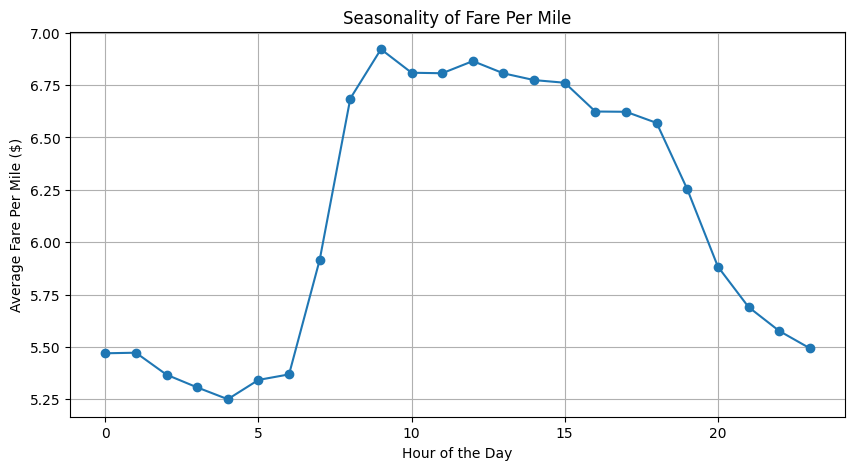

<ipython-input-53-8d6e2f55a5e1>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df['fare_per_mile'].resample('H').mean().dropna()


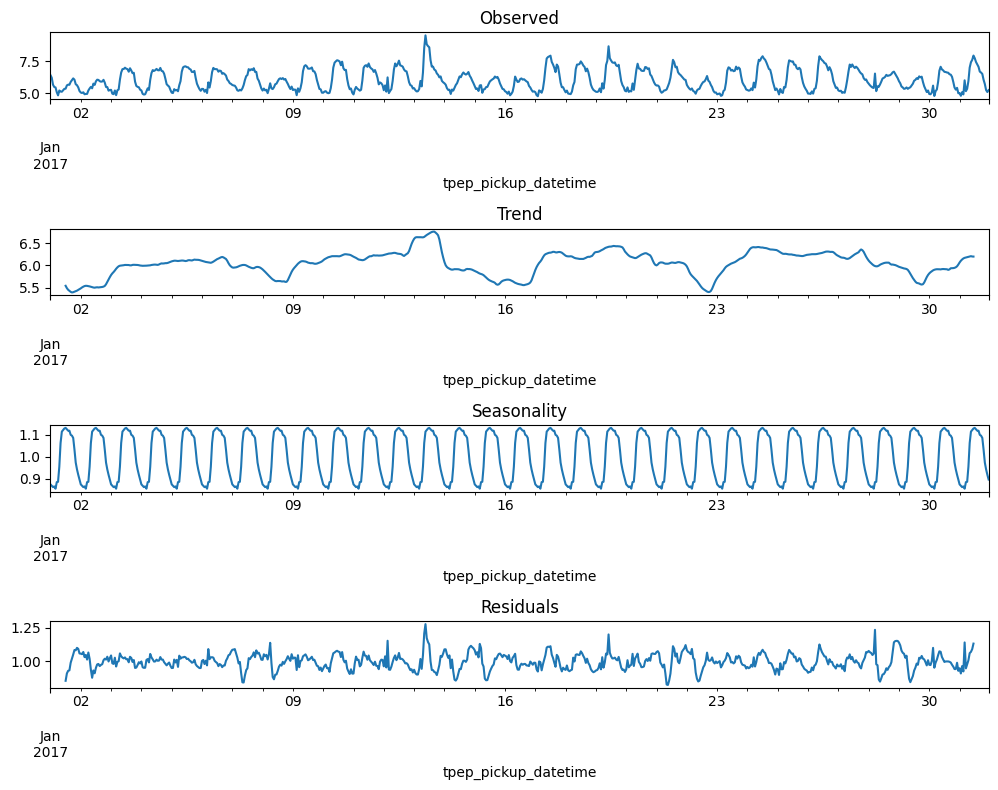

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract hour from timestamp
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Aggregate average fare per mile per hour
hourly_fare_per_mile = df.groupby('hour')['fare_per_mile'].mean()

# Plot seasonality of fare per mile
plt.figure(figsize=(10, 5))
plt.plot(hourly_fare_per_mile.index, hourly_fare_per_mile.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Seasonality of Fare Per Mile")
plt.grid(True)
plt.show()

# Set timestamp index for time series analysis
df.set_index('tpep_pickup_datetime', inplace=True)
df_resampled = df['fare_per_mile'].resample('H').mean().dropna()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df_resampled, model='multiplicative')

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
decomposition.resid.plot(ax=axes[3], title='Residuals')

plt.tight_layout()
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller

# Extract residuals and drop NaN values
residuals = decomposition.resid.dropna()

# Perform ADF test
adf_test = adfuller(residuals)

# Print results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

if adf_test[1] < 0.05:
    print("Residuals are stationary (reject H0)")
else:
    print("Residuals are NOT stationary (fail to reject H0)")

ADF Statistic: -10.578946677239323
p-value: 6.98637279908823e-19
Critical Values: {'1%': np.float64(-3.4397263458688045), '5%': np.float64(-2.8656777575510204), '10%': np.float64(-2.5689734469387755)}
Residuals are stationary (reject H0)


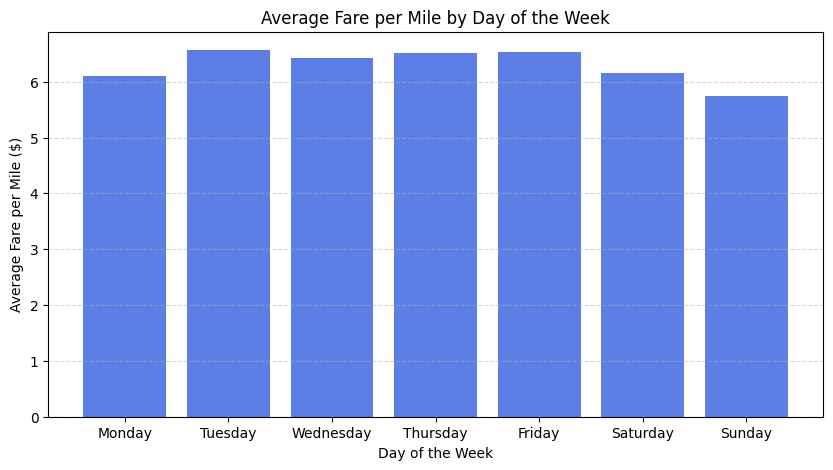

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
df = df.reset_index()
# Ensure datetime format (only needed once)
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract weekday names
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.day_name()

# Group by weekday and compute mean fare per mile
avg_fpm_weekday = df.groupby("pickup_weekday")["fare_per_mile"].mean()

# Reorder days to start from Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_fpm_weekday = avg_fpm_weekday.reindex(ordered_days)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_fpm_weekday.index, avg_fpm_weekday.values, color="royalblue", alpha=0.85)
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

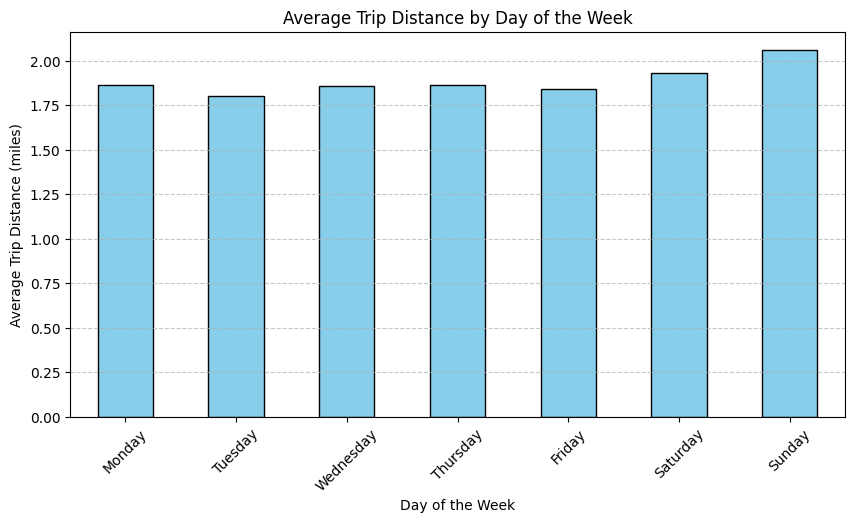

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format (only needed once)
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract weekday name
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.day_name()

# Compute average trip distance per weekday
avg_distance_per_day = df.groupby("pickup_weekday")["trip_distance"].mean()

# Reorder days to start from Monday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_distance_per_day = avg_distance_per_day.reindex(ordered_days)

# Plot
plt.figure(figsize=(10, 5))
avg_distance_per_day.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Distance (miles)")
plt.title("Average Trip Distance by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [57]:
# Group by pickup and dropoff locations and compute summary stats
location_stats = df.groupby(["PULocationID", "DOLocationID"])["fare_per_mile"].describe()
print(location_stats)

                           count      mean        std       min       25%  \
PULocationID DOLocationID                                                   
1            1              78.0  5.017006  12.480648  0.000000  0.000000   
             229             1.0  5.310881        NaN  5.310881  5.310881   
             265             3.0  6.304852   2.856872  3.164557  5.082278   
2            95              1.0  2.914798        NaN  2.914798  2.914798   
3            3              10.0  4.148402   1.706485  0.000000  3.714054   
...                          ...       ...        ...       ...       ...   
265          260             1.0  6.451613        NaN  6.451613  6.451613   
             262             1.0  3.763441        NaN  3.763441  3.763441   
             263             1.0  6.168831        NaN  6.168831  6.168831   
             264             3.0  7.497166   4.510478  3.741497  4.995748   
             265           845.0  8.010977  28.778992  0.000000  0.423729   

<ipython-input-58-9da837b546c1>:5: FutureWarning: The provided callable <function mean at 0x7a5c4f9b93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(index="PULocationID", columns="DOLocationID", values="fare_per_mile", aggfunc=np.mean)


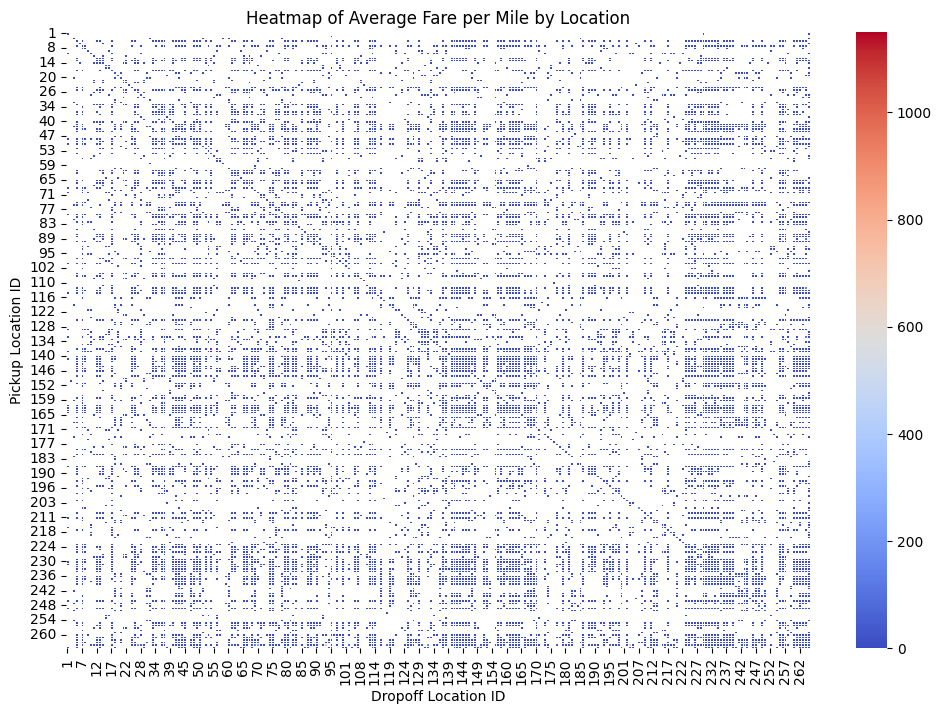

In [58]:
import numpy as np
import seaborn as sns

# Compute pivot table
pivot_table = df.pivot_table(index="PULocationID", columns="DOLocationID", values="fare_per_mile", aggfunc=np.mean)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Dropoff Location ID")
plt.ylabel("Pickup Location ID")
plt.title("Heatmap of Average Fare per Mile by Location")
plt.show()

In [59]:
from scipy.stats import f_oneway

# Extract fare_per_mile for top 5 busiest pickup locations
top_pu_locations = df["PULocationID"].value_counts().index[:5]

# Create groups
groups = [df[df["PULocationID"] == loc]["fare_per_mile"].dropna() for loc in top_pu_locations]

# Perform ANOVA test
stat, p_value = f_oneway(*groups)
print(f"ANOVA test statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("Significant difference in fare per mile across locations (location affects fare).")
else:
    print("No significant difference (location might not strongly influence fare).")

ANOVA test statistic: 59.57886482303406, p-value: 2.1566729319441993e-50
Significant difference in fare per mile across locations (location affects fare).


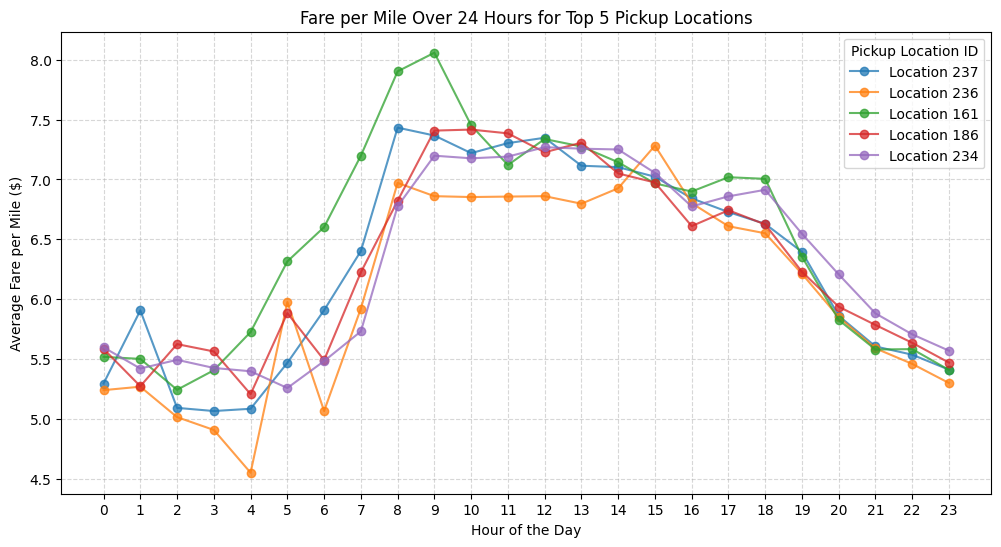

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find top 5 most popular pickup locations
top_5_pu = df["PULocationID"].value_counts().index[:5]

# Filter data for only those top 5 locations
df_top5 = df[df["PULocationID"].isin(top_5_pu)].copy()

# Extract hour of the day
df_top5["pickup_hour"] = df_top5["tpep_pickup_datetime"].dt.hour

# Group by pickup location and hour to compute mean fare per mile
hourly_fpm = df_top5.groupby(["PULocationID", "pickup_hour"])["fare_per_mile"].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
for loc in top_5_pu:
    plt.plot(hourly_fpm.columns, hourly_fpm.loc[loc], label=f"Location {loc}", marker="o", alpha=0.75)

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Fare per Mile Over 24 Hours for Top 5 Pickup Locations")
plt.legend(title="Pickup Location ID")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(range(24))
plt.show()

<ipython-input-61-4fb6052346b4>:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df["pickup_minute"] = df["tpep_pickup_datetime"].dt.floor("T")  # Rounds to nearest minute


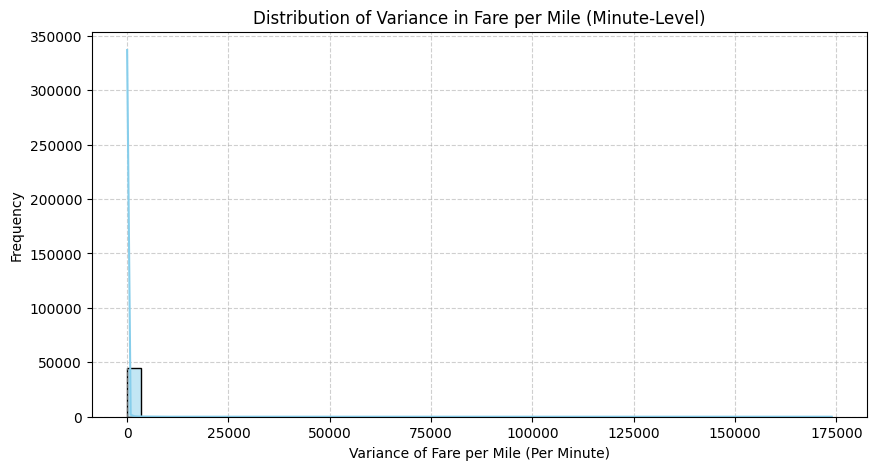

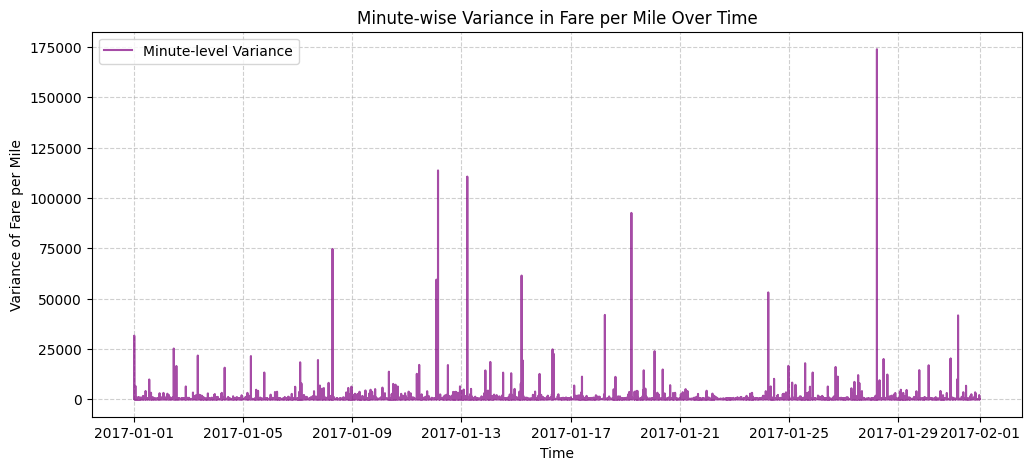

Mean Variance: 80.5325
Median Variance: 5.1937
Standard Deviation of Variance: 1488.7010
ADF Test p-value: 0.0000 (Stationary if < 0.05)


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Ensure datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract minute-level timestamps
df["pickup_minute"] = df["tpep_pickup_datetime"].dt.floor("T")  # Rounds to nearest minute

# Compute variance of fare_per_mile for each minute
minute_variance = df.groupby("pickup_minute")["fare_per_mile"].var().dropna()

# Descriptive statistics
mean_variance = minute_variance.mean()
median_variance = minute_variance.median()
std_variance = minute_variance.std()

# ADF test for stationarity
adf_test = adfuller(minute_variance.dropna())
adf_p_value = adf_test[1]

# Plot histogram of variance
plt.figure(figsize=(10, 5))
sns.histplot(minute_variance, bins=50, kde=True, color="skyblue")
plt.xlabel("Variance of Fare per Mile (Per Minute)")
plt.ylabel("Frequency")
plt.title("Distribution of Variance in Fare per Mile (Minute-Level)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Plot time series of variance
plt.figure(figsize=(12, 5))
plt.plot(minute_variance.index, minute_variance, alpha=0.7, label="Minute-level Variance", color="purple")
plt.xlabel("Time")
plt.ylabel("Variance of Fare per Mile")
plt.title("Minute-wise Variance in Fare per Mile Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Print statistics
print(f"Mean Variance: {mean_variance:.4f}")
print(f"Median Variance: {median_variance:.4f}")
print(f"Standard Deviation of Variance: {std_variance:.4f}")
print(f"ADF Test p-value: {adf_p_value:.4f} (Stationary if < 0.05)")

In [22]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767884 entries, 0 to 8767883
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   object        
 18  airport_fee           

In [24]:
df.shape

(8767884, 20)

In [25]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2017-01-01 00:00:02   2017-01-01 00:39:22                4   
1         1  2017-01-01 00:00:02   2017-01-01 00:03:50                1   
2         1  2017-01-01 00:00:03   2017-01-01 00:06:58                1   
3         2  2017-01-01 00:00:05   2017-01-01 00:05:04                5   
4         1  2017-01-01 00:00:05   2017-01-01 00:08:33                2   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.75           1                  N           186            36   
1           0.50           1                  N            48            48   
2           0.80           1                  N           162           161   
3           1.76           1                  N           140            74   
4           0.90           1                  N            48            50   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         22.0    0.5      0.5        4.66           0.0   
1             2          4.0    0.5      0.5        0.00           0.0   
2             1          6.0    0.5      0.5        1.45           0.0   
3             2          7.0    0.5      0.5        0.00           0.0   
4             1          7.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount congestion_surcharge airport_fee  \
0                    0.3         27.96                 None        None   
1                    0.3          5.30                 None        None   
2                    0.3          8.75                 None        None   
3                    0.3          8.30                 None        None   
4                    0.3          8.30                 None        None   

   fare_per_mile  
0       2.838710  
1       8.000000  
2       7.500000  
3       3.977273  
4       7.777778

In [29]:
import pandas as pd

# Only reset the index if it's not already set
if 'tpep_pickup_datetime' not in df.index.names:
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    df.set_index('tpep_pickup_datetime', inplace=True)

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Resample to 1-minute intervals and take the mean
df_per_minute = numeric_df.resample('1min').mean().dropna(how='all')

# Save to CSV
df_per_minute.to_csv('aggregated_fare_data_per_minute.csv')


In [30]:
df_per_minute.head(

)

VendorID  passenger_count  trip_distance  RatecodeID  \
tpep_pickup_datetime                                                         
2017-01-01 00:00:00   1.558442         1.896104       2.321818    1.000000   
2017-01-01 00:01:00   1.493333         1.826667       2.279467    1.000000   
2017-01-01 00:02:00   1.584746         1.728814       2.600339    1.000000   
2017-01-01 00:03:00   1.551724         1.724138       2.397310    1.000000   
2017-01-01 00:04:00   1.547619         1.690476       2.330952    1.015873   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2017-01-01 00:00:00     160.259740    138.896104      1.480519    10.363636   
2017-01-01 00:01:00     163.226667    155.360000      1.400000     9.893333   
2017-01-01 00:02:00     150.194915    135.576271      1.567797    11.444915   
2017-01-01 00:03:00     142.779310    152.717241      1.468966    10.972414   
2017-01-01 00:04:00     153.968254    167.428571      1.468254    11.019841   

                      extra   mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                              
2017-01-01 00:00:00     0.5  0.500000    1.489351      0.071948   
2017-01-01 00:01:00     0.5  0.500000    1.626133      0.000000   
2017-01-01 00:02:00     0.5  0.500000    1.193475      0.000000   
2017-01-01 00:03:00     0.5  0.500000    1.106759      0.038207   
2017-01-01 00:04:00     0.5  0.496032    1.338016      0.000000   

                      improvement_surcharge  total_amount  fare_per_mile  
tpep_pickup_datetime                                                      
2017-01-01 00:00:00                     0.3     13.224935       7.182499  
2017-01-01 00:01:00                     0.3     12.819467       5.434960  
2017-01-01 00:02:00                     0.3     13.938390       9.931773  
2017-01-01 00:03:00                     0.3     13.417379       5.575923  
2017-01-01 00:04:00                     0.3     13.693175      21.773644

In [31]:
df_per_minute.shape

(44639, 15)

In [32]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df_per_minute["fare_per_mile"].dropna())

# Print results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Trend Exists" if result[1] > 0.05 else "No Significant Trend")

ADF Statistic: -6.2798410934438325
p-value: 3.820319600288587e-08
No Significant Trend


<ipython-input-40-8b5dfb8fcdbc>:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_per_minute['fare_per_mile'].resample('1T').mean().interpolate()


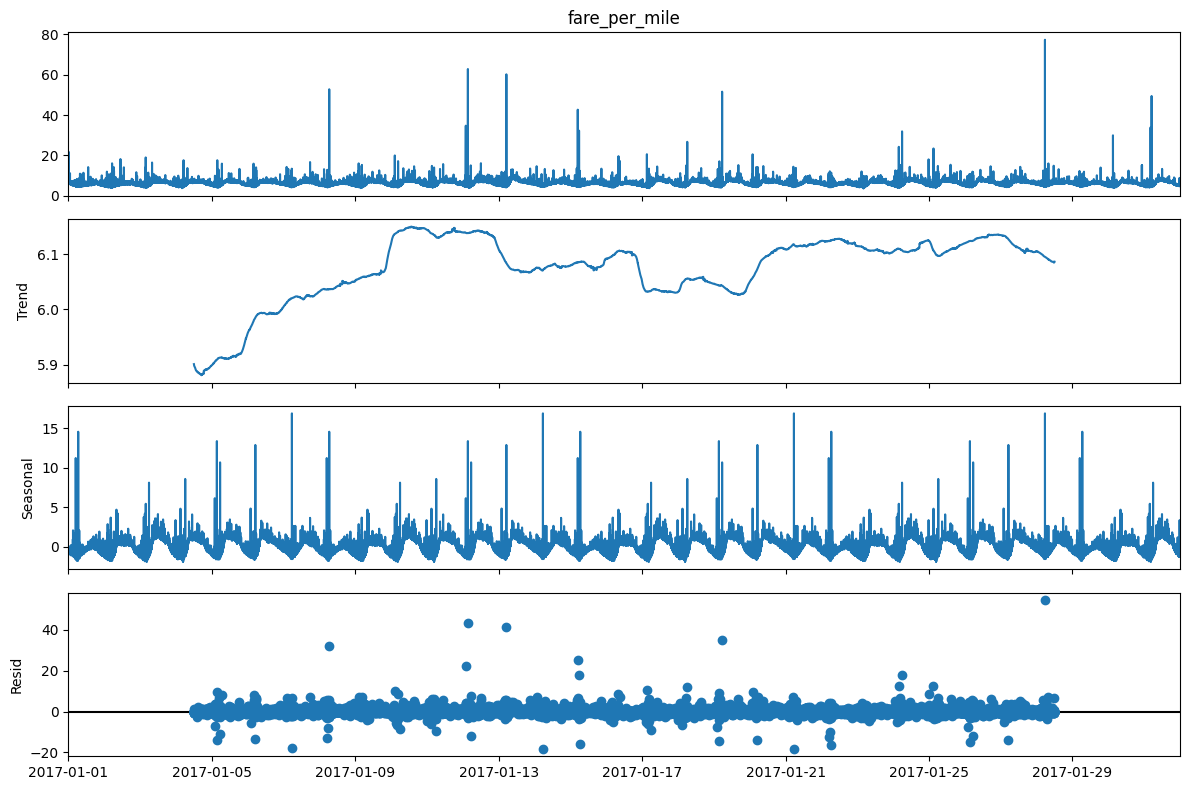

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# If the index is already datetime, we proceed directly
df_resampled = df_per_minute['fare_per_mile'].resample('1T').mean().interpolate()

# Perform decomposition
decomposition = seasonal_decompose(df_resampled, model='additive', period=10080)

# Plot the result
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()



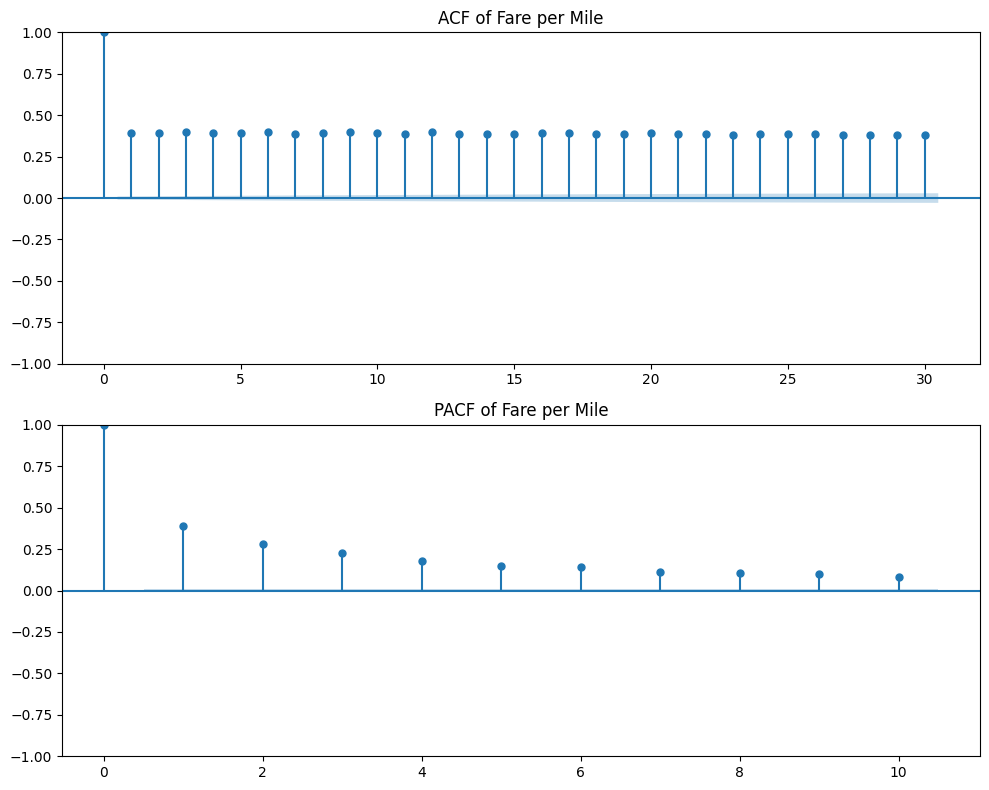

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fare_per_mile = df_per_minute['fare_per_mile'].dropna()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(fare_per_mile, ax=ax[0], lags=30)
plot_pacf(fare_per_mile, ax=ax[1], lags=10)
ax[0].set_title('ACF of Fare per Mile')
ax[1].set_title('PACF of Fare per Mile')
plt.tight_layout()
plt.show()